In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
#read in

df = pd.read_csv('170327 split series composite.csv', comment = '#')

df.head()
cols = ['ID', 'Type', 'Line', 'Intensity', 'Mosaic', 'Segments']
df = df[cols]
df.head()

,ID,Type,Line,Intensity,Mosaic,Segments
0,336 line1 w1,Full,A,8144.663579,1,6
1,336 line1 w2,Full,A,3379.948539,1,6
2,336 line1 w3,Full,A,8264.362414,0,8
3,336 line1 w4,Full,A,7263.474334,0,8
4,336 line1 w5,Full,A,2935.331020,1,7


In [3]:
# df2 = pd.melt(df, value_vars = list(df.columns), var_name = 'Culture', value_name = 'AI')
# df.dropna(inplace = True)
# df_tidy = df.reset_index(drop = True)
# df_tidy.head()

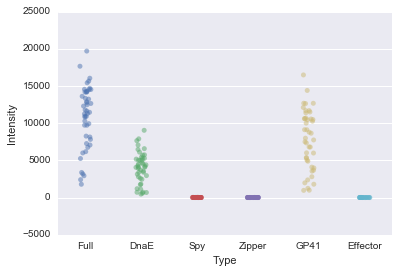

In [4]:
sns.stripplot(data = df, x = 'Type', y = 'Intensity', jitter = True, alpha = 0.5, marker = 'o' )

# plt.savefig('split cGALs.pdf')
# plt.show()
# plt.close()


In [5]:
# sns.swarmplot(data = df, x = 'Type', y = 'Intensity')


In [6]:
# sns.boxplot(data = df, x = 'Type', y = 'Intensity')


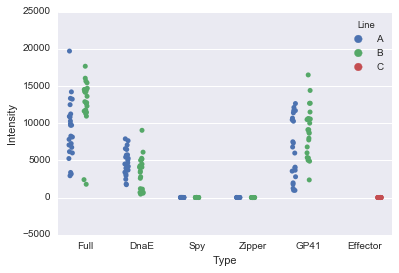

In [7]:
sns.stripplot(data = df, x = 'Type', y = 'Intensity', jitter = True, hue = 'Line', split = True)



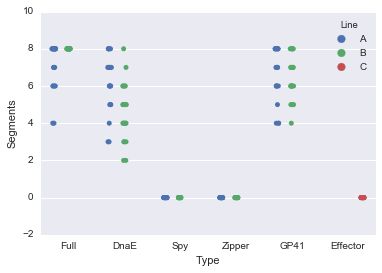

In [8]:
sns.stripplot(data = df, x = 'Type', y = 'Segments', jitter = True, hue = 'Line', split = True)



#### 

In [9]:
df.loc[df['Type'] == 'Full'].Intensity.mean()

10834.11936542553

In [10]:
uni = df['Type'].unique()
df.loc[df['Type'] == uni[0]].Intensity.sem()

612.88649053504093

In [ ]:
sns.xkcd_grab['dark green']

([<matplotlib.axis.YTick at 0x5192406be0>,
 <a list of 5 Text yticklabel objects>)

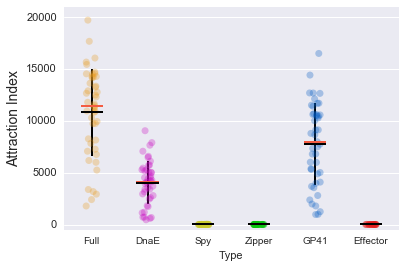

In [11]:
colors = ['#e89c20', '#c90cc2', '#c9c930', '#08c40f', '#025bc2', '#e31e1e']
sns.stripplot(data = df, x = 'Type', y = 'Intensity', jitter = True, alpha = 0.3, size = 7, 
              palette = sns.color_palette(colors)
                )
barwidth = 0.2
types = df['Type'].unique()
for j in range(len(types)):
    plt.hlines(df.loc[df['Type'] == types[j]].Intensity.mean(), 
               xmin = j- barwidth, xmax = j+ barwidth, lw = 2, zorder = 4)
    plt.errorbar(j, df.loc[df['Type'] == types[j]].Intensity.mean(), yerr = df.loc[df['Type'] == types[j]].Intensity.std(), 
                 fmt = '-', ecolor = 'black', capsize = 0, elinewidth  = 2, barsabove = True, zorder = 2)
    plt.hlines(df.loc[df['Type'] == types[j]].Intensity.median(), 
               xmin = j- barwidth, xmax = j+ barwidth, lw = 2, zorder = 3, color = '#f45c42')

plt.ylim(-500, 21000)
plt.ylabel('Attraction Index', fontsize = 14)
plt.gca().tick_params(axis= 'y', labelsize = 11)
plt.yticks([0, 5000, 10000, 15000, 20000])